# 04 &mdash; Correlation Analysis

*(Data Analysis and Visualization 505067 &mdash; Final Report)*

In [59]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
df = pd.read_csv("../data/salaries.csv")

In [7]:
ordinal_encodes = {
    "experience_level": {"EN": 1,"MI": 2,"SE": 3,"EX": 4},
    "company_size": {"S": 1, "M": 2, "L": 3},
}

for col, encodes in ordinal_encodes.items():
    df[f"_{col}"] = df[col].map(encodes)

df[["experience_level", "_experience_level", "company_size", "_company_size"]].tail()

,experience_level,_experience_level,company_size,_company_size
57189,SE,3,L,3
57190,MI,2,L,3
57191,EN,1,S,1
57192,EN,1,L,3
57193,SE,3,L,3


In [48]:
feature_cols = ["work_year", "remote_ratio", "_experience_level", "_company_size"]
target_col = "salary_in_usd"

In [49]:
for col in feature_cols:
    rho, p_value = stats.spearmanr(df[target_col], df[col])
    print(f"[{col}] Spearman rho = {rho}; p-value = {p_value}")

[work_year] Spearman rho = 0.06064107525648107; p-value = 9.662621380100931e-48
[remote_ratio] Spearman rho = -0.0664207506996239; p-value = 6.145790224151134e-57
[_experience_level] Spearman rho = 0.3401098632359172; p-value = 0.0
[_company_size] Spearman rho = 0.010077861017747478; p-value = 0.01594570503896483


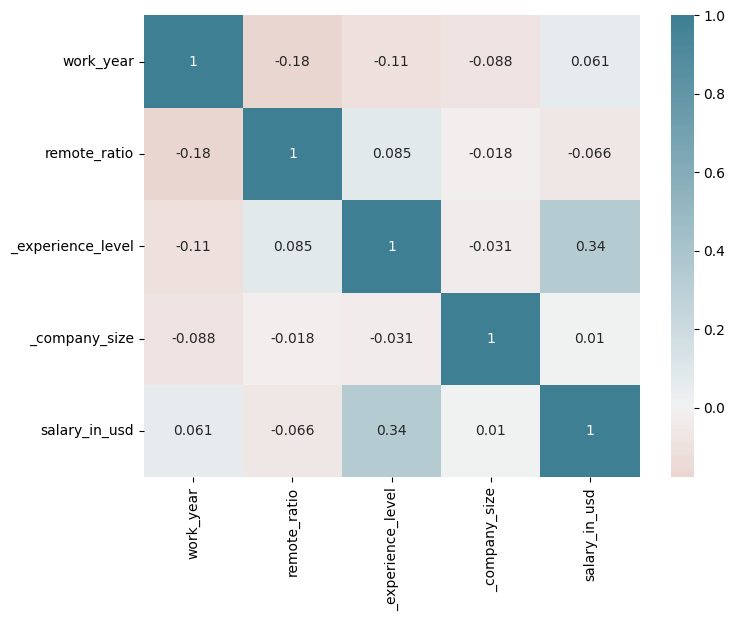

In [50]:
corr_matrix = df[feature_cols + [target_col]].corr(method="spearman")

plt.figure(figsize=(8, 6))

palette = sns.diverging_palette(20, 220, as_cmap=True)
sns.heatmap(corr_matrix, annot=True, cmap=palette, center=0)

plt.show()

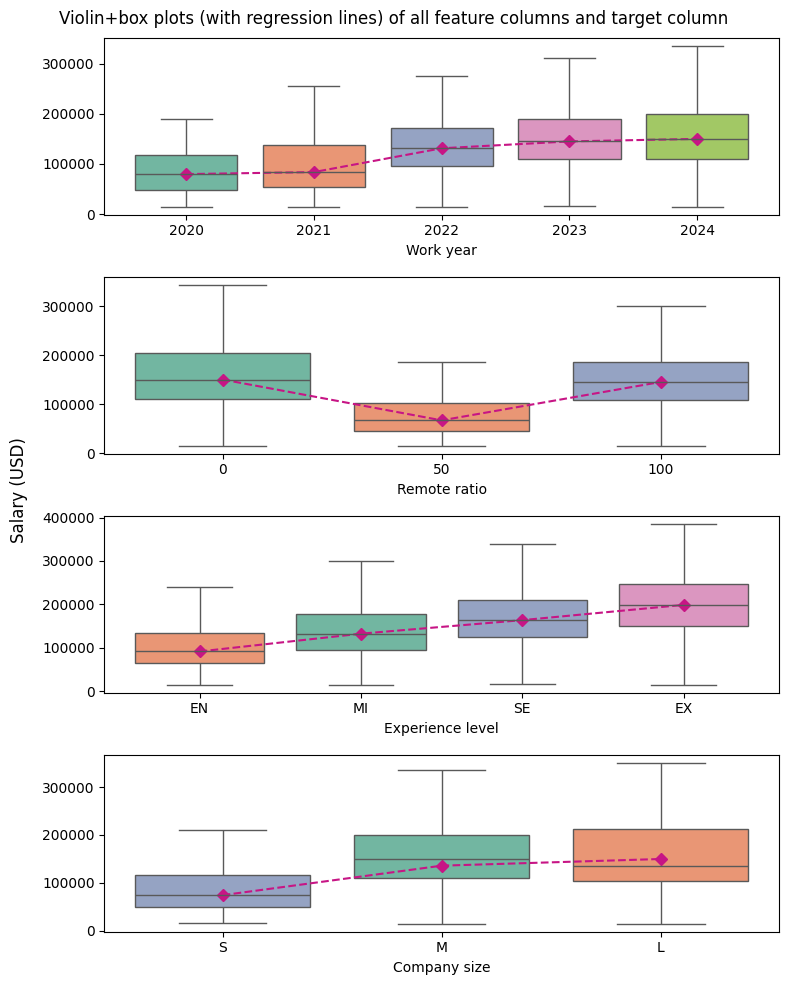

In [127]:
fig, axes = plt.subplots(len(feature_cols), 1, figsize=(8, 10))

for i, col in enumerate(feature_cols):
    actual_col = re.sub(r"^_", "", col)

    medians = df.groupby(actual_col)[target_col].median()
    order = None
    
    if actual_col != col:
        medians = medians.sort_values()
        order = df.groupby(actual_col)[col].median().sort_values().index
    
    sns.boxplot(
        data=df, x=actual_col, y=target_col, order=order,
        hue=actual_col, palette="Set2", ax=axes[i],
        legend=False, showfliers=False,
    )
    axes[i].plot(
        range(len(medians)), medians.values,
        color="mediumvioletred", marker="D", linestyle="--",
    )

    axes[i].set_xlabel(actual_col.replace("_", " ").capitalize())
    axes[i].set_ylabel("")

fig.suptitle("Violin+box plots (with regression lines) of all feature columns and target column")
fig.supylabel("Salary (USD)")

plt.tight_layout()

plt.show()